In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer

In [10]:
# Definir o caminho do arquivo
file_path = r'C:\Users\Jesuino\Downloads\teste-25\data\nafld1.csv'

# Carregar o conjunto de dados
df = pd.read_csv(file_path)

In [11]:
# Selecionar as colunas relevantes para X e y
X = df[['age', 'male', 'weight', 'height', 'bmi']]
y = df['status']

# Dividir os dados em treino (70%) e teste (30%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [12]:
# Inicializar o imputer para preencher valores ausentes com a mediana das colunas
imputer = SimpleImputer(strategy='median')

# Ajustar o imputer nos dados de treino e transformá-los
X_train = imputer.fit_transform(X_train)

# Transformar os dados de teste
X_test = imputer.transform(X_test)

In [13]:
# Inicializar o modelo de Regressão Logística
model = LogisticRegression()

# Treinar o modelo nos dados de treino
model.fit(X_train, y_train)

LogisticRegression()

In [14]:
# Fazer previsões nos dados de teste
y_pred = model.predict(X_test)

# Calcular métricas de desempenho
acurácia = accuracy_score(y_test, y_pred)
precisão = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Exibir métricas de desempenho
print(f"Acurácia: {acurácia}")
print(f"Precisão: {precisão}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Acurácia: 0.9242165242165242
Precisão: 0.6307692307692307
Recall: 0.0985576923076923
F1-score: 0.1704781704781705


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc

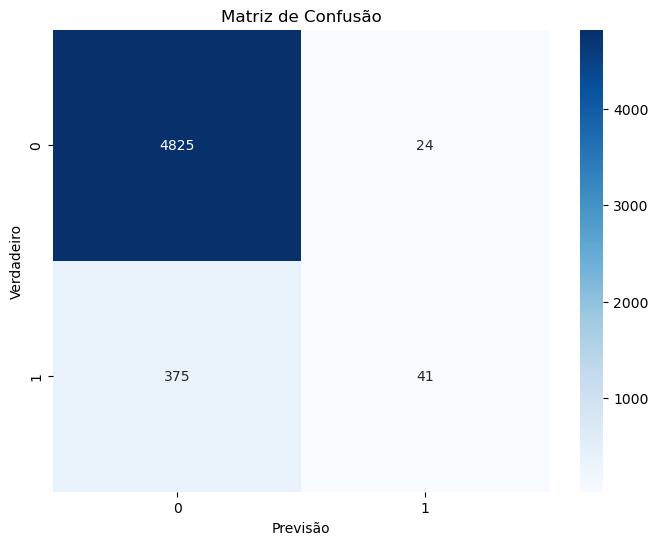

Acurácia: 0.9242165242165242
Precisão: 0.6307692307692307
Recall: 0.0985576923076923
F1-score: 0.1704781704781705


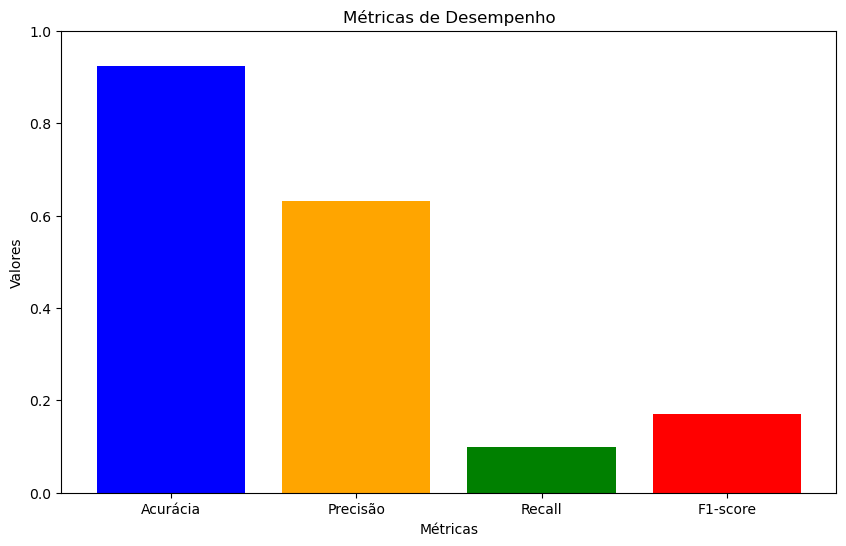

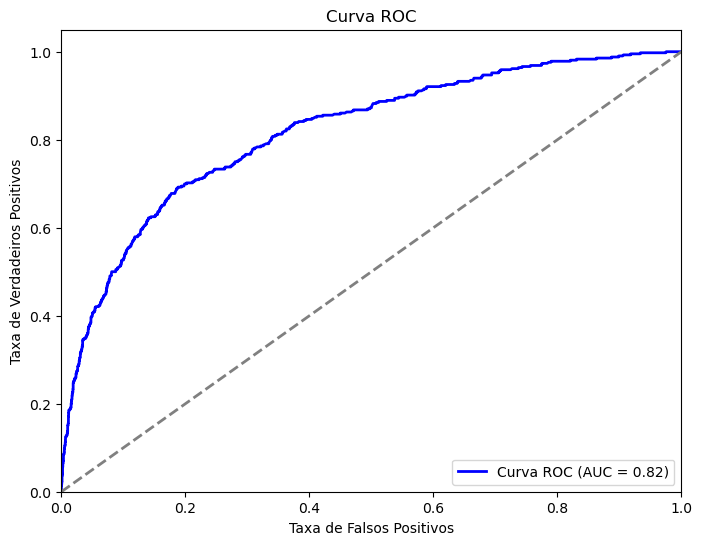

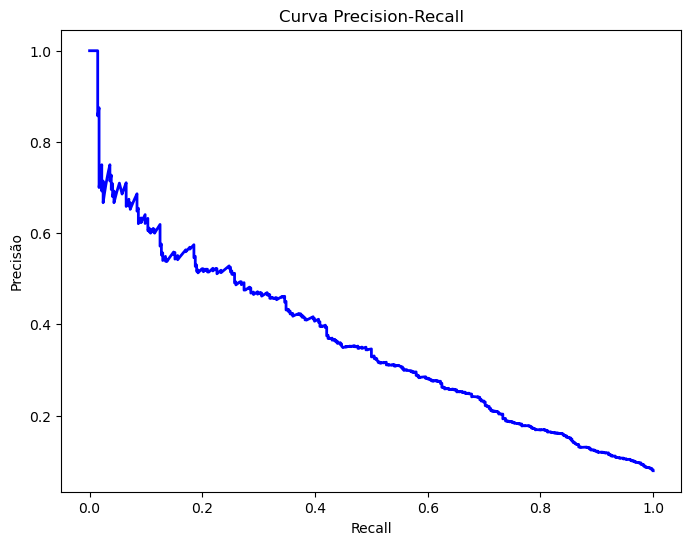

In [26]:
# Fazer previsões nos dados de teste
y_pred = model.predict(X_test)

# Calcular a Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)

# Plotar a Matriz de Confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Previsão')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()

# Calcular as Métricas de Desempenho
acurácia = accuracy_score(y_test, y_pred)
precisão = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Exibir Métricas de Desempenho
print(f"Acurácia: {acurácia}")
print(f"Precisão: {precisão}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

# Gráfico de Barras para as Métricas de Desempenho
metrics = {'Acurácia': acurácia, 'Precisão': precisão, 'Recall': recall, 'F1-score': f1}
plt.figure(figsize=(10, 6))
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Métricas')
plt.ylabel('Valores')
plt.title('Métricas de Desempenho')
plt.ylim(0, 1)
plt.show()

# Curva ROC
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

# Curva Precision-Recall
precisions, recalls, _ = precision_recall_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(recalls, precisions, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.show()